In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder

from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import DeiTForImageClassification, DeiTFeatureExtractor

from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
our_folders = [
    "Acne and Rosacea Photos",
    # "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions",
    # "Atopic Dermatitis Photos",
    # "Bullous Disease Photos",
    # "Cellulitis Impetigo and other Bacterial Infections",
    # "Eczema Photos",
    # "Exanthems and Drug Eruptions",
    # "Hair Loss Photos Alopecia and other Hair Diseases",
    # "Herpes HPV and other STDs Photos",
    # "Light Diseases and Disorders of Pigmentation",
    # "Lupus and other Connective Tissue diseases",
    "Melanoma Skin Cancer Nevi and Moles",
    "Nail Fungus and other Nail Disease",
    # "Poison Ivy Photos and other Contact Dermatitis",
    "Psoriasis pictures Lichen Planus and related diseases",
    # "Scabies Lyme Disease and other Infestations and Bites",
    "Seborrheic Keratoses and other Benign Tumors",
    # "Systemic Disease",
    "Tinea Ringworm Candidiasis and other Fungal Infections",
    # "Urticaria Hives",
    # "Vascular Tumors",
    # "Vasculitis Photos",
    "Warts Molluscum and other Viral Infections",
]

In [3]:
root_dir = "train"
test_dir = "test"

In [4]:
# Assuming root_dir and our_folders are defined
for folder_name in our_folders:
    # Extract the first word from the folder name
    variable_name = folder_name.split()[0] + "_train_path"

    # Create the full path
    full_path = os.path.join(root_dir, folder_name)

    # Assign the path to a variable dynamically
    globals()[variable_name] = full_path

# Assuming root_dir and our_folders are defined
for folder_name in our_folders:
    # Extract the first word from the folder name
    variable_name = folder_name.split()[0] + "_test_path"

    # Create the full path
    full_path = os.path.join(test_dir, folder_name)

    # Assign the path to a variable dynamically
    globals()[variable_name] = full_path

In [5]:
# Assuming root_dir, our_folders, and train paths are already set up
for folder_name in our_folders:
    # Extract the first word of the folder name to construct variable names
    variable_name = folder_name.split()[0] + "_train_files"
    train_path_variable = folder_name.split()[0] + "_train_path"

    # Retrieve the train path dynamically
    train_path = globals()[train_path_variable]

    # Generate the list of test files
    train_files = ([files_ for _, _, files_ in os.walk(train_path)])[0]

    # Assign the test files to a dynamically created variable
    globals()[variable_name] = train_files


# Assuming root_dir, our_folders, and train paths are already set up
for folder_name in our_folders:
    # Extract the first word of the folder name to construct variable names
    variable_name = folder_name.split()[0] + "_test_files"
    test_path_variable = folder_name.split()[0] + "_test_path"

    # Retrieve the train path dynamically
    test_path = globals()[test_path_variable]

    # Generate the list of test files
    test_files = ([files_ for _, _, files_ in os.walk(test_path)])[0]

    # Assign the test files to a dynamically created variable
    globals()[variable_name] = test_files

In [6]:
train_dirs = []
for i in our_folders:
    for folder_, _, files_ in os.walk(f"train/{i}"):
        print(folder_)
        train_dirs.append(folder_)

train/Acne and Rosacea Photos
train/Melanoma Skin Cancer Nevi and Moles
train/Nail Fungus and other Nail Disease
train/Psoriasis pictures Lichen Planus and related diseases
train/Seborrheic Keratoses and other Benign Tumors
train/Tinea Ringworm Candidiasis and other Fungal Infections
train/Warts Molluscum and other Viral Infections


In [7]:
def plotGridImages(d_name, list_files, train_path, nrows=1, ncols=5):
    fig = plt.figure(1, figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.05)
    print(f"{d_name}")

    for i, img_id in enumerate(random.sample(list_files, ncols)):
        ax = grid[i]
        image_dir_path = os.path.join(train_path, img_id)
        img = image.load_img(image_dir_path, target_size=(224, 224))  # Corrected line
        img = image.img_to_array(img)
        ax.imshow(img / 255.0)
        ax.text(
            10,
            200,
            f"LABEL: {d_name}",
            color="k",
            backgroundcolor="w",
            alpha=0.8,
        )
        ax.axis("off")
    plt.show()

Acne


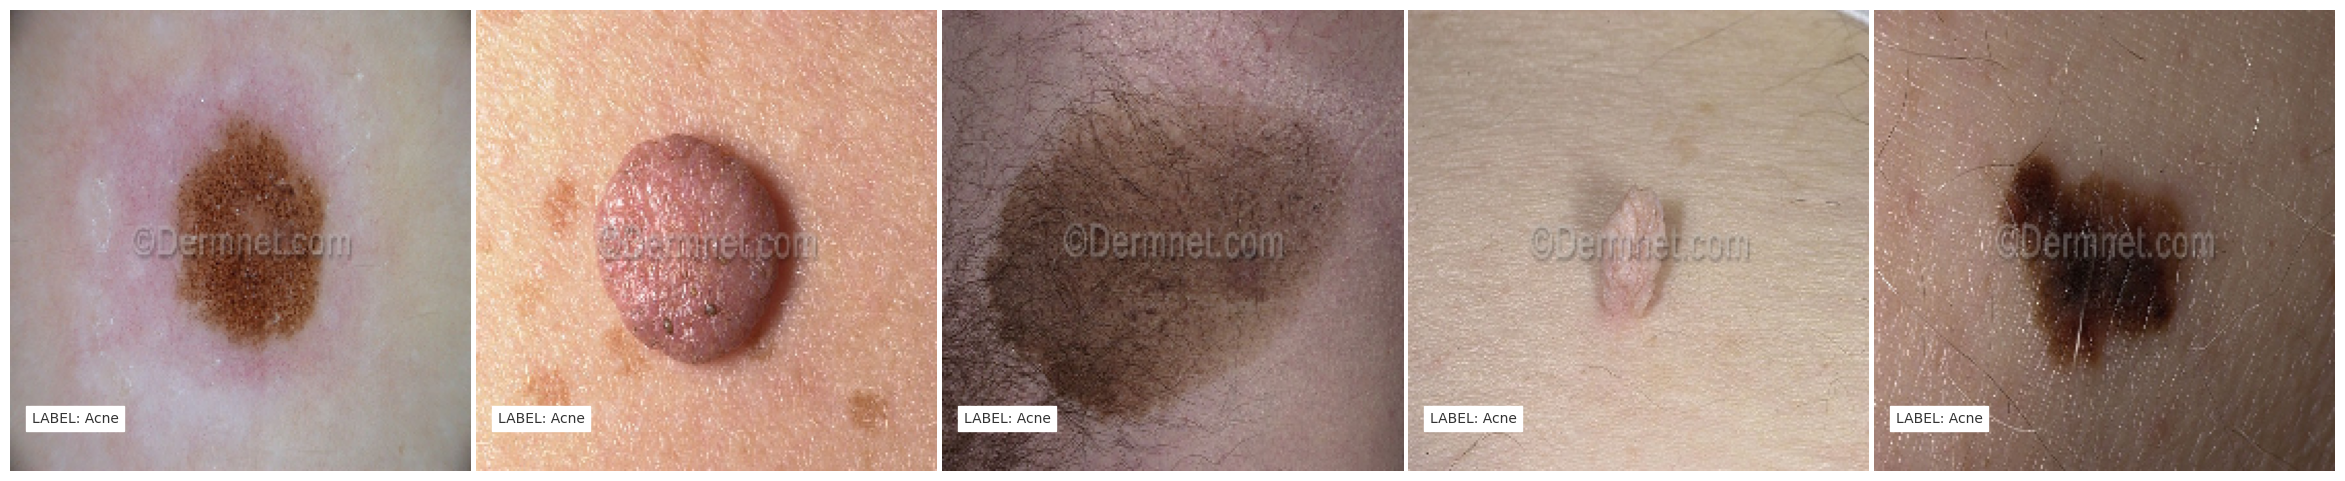

In [8]:
plotGridImages("Acne", Melanoma_train_files, Melanoma_train_path, ncols=5)

Warts


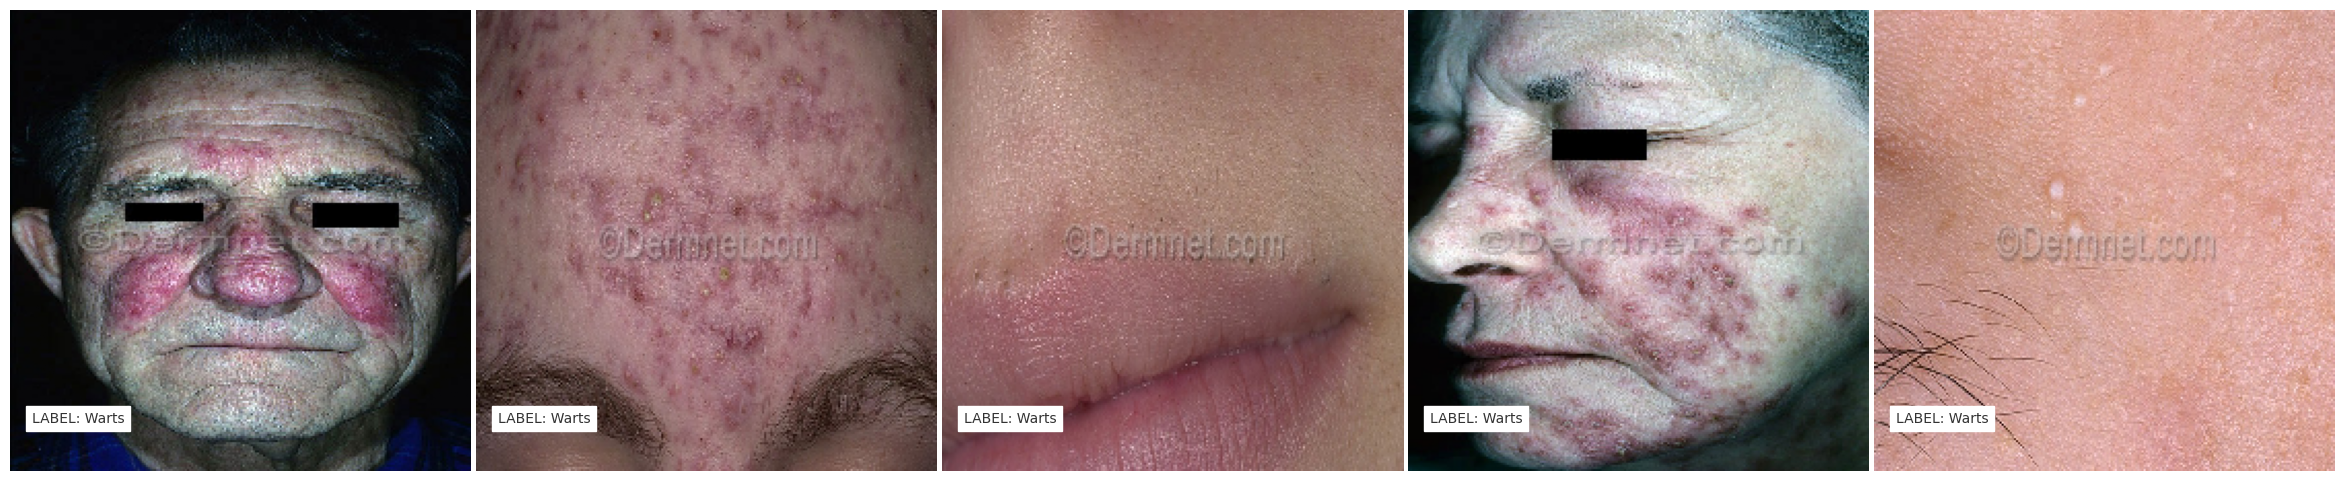

In [9]:
plotGridImages("Warts", Acne_train_files, Acne_train_path, ncols=5)

In [10]:
# For TRAIN

dfs = []

for folder_name in our_folders:
    # Extract the base name for variable names
    base_name = folder_name.split()[0]

    # Retrieve the train path and train files dynamically
    train_path = globals()[base_name + "_train_path"]
    train_files = globals()[base_name + "_train_files"]

    # Create the DataFrame
    df = pd.DataFrame()
    df["Image"] = [os.path.join(train_path, img) for img in train_files]
    df["Label"] = base_name  # Label based on the folder name

    # Append the DataFrame to the list
    dfs.append(df)

# Combine all DataFrames into one final DataFrame
final_df = pd.concat(dfs, ignore_index=True)
print(final_df.shape)
final_df.sample(10)

(7505, 2)


Image       Label
6655  train/Warts Molluscum and other Viral Infectio...       Warts
4222  train/Seborrheic Keratoses and other Benign Tu...  Seborrheic
3859  train/Seborrheic Keratoses and other Benign Tu...  Seborrheic
130   train/Acne and Rosacea Photos/perioral-dermati...        Acne
882   train/Melanoma Skin Cancer Nevi and Moles/mali...    Melanoma
5379  train/Tinea Ringworm Candidiasis and other Fun...       Tinea
126   train/Acne and Rosacea Photos/07RosaceaOK08280...        Acne
3133  train/Psoriasis pictures Lichen Planus and rel...   Psoriasis
4482  train/Seborrheic Keratoses and other Benign Tu...  Seborrheic
1245  train/Melanoma Skin Cancer Nevi and Moles/nevu...    Melanoma

In [11]:
# For TEST

dfs_test = []

for folder_name in our_folders:
    # Extract the base name for variable names
    base_name = folder_name.split()[0]

    # Retrieve the train path and train files dynamically
    test_path = globals()[base_name + "_test_path"]
    test_files = globals()[base_name + "_test_files"]

    # Create the DataFrame
    df_2 = pd.DataFrame()
    df_2["Image"] = [os.path.join(test_path, img) for img in test_files]
    df_2["Label"] = base_name  # Label based on the folder name

    # Append the DataFrame to the list
    dfs_test.append(df_2)

# Combine all DataFrames into one final DataFrame
final_df_test = pd.concat(dfs_test, ignore_index=True)
print(final_df_test.shape)
final_df_test.sample(10)

(1981, 2)


Image       Label
1020  test/Psoriasis pictures Lichen Planus and rela...   Psoriasis
545   test/Nail Fungus and other Nail Disease/chroni...        Nail
1297  test/Seborrheic Keratoses and other Benign Tum...  Seborrheic
1831  test/Warts Molluscum and other Viral Infection...       Warts
464   test/Nail Fungus and other Nail Disease/lichen...        Nail
1651  test/Tinea Ringworm Candidiasis and other Fung...       Tinea
833   test/Psoriasis pictures Lichen Planus and rela...   Psoriasis
1499  test/Tinea Ringworm Candidiasis and other Fung...       Tinea
1837  test/Warts Molluscum and other Viral Infection...       Warts
1441  test/Tinea Ringworm Candidiasis and other Fung...       Tinea

In [12]:
final_df["Label"].value_counts()

Label
Psoriasis     1405
Seborrheic    1371
Tinea         1300
Warts         1086
Nail          1040
Acne           840
Melanoma       463
Name: count, dtype: int64

In [13]:
final_df_test["Label"].value_counts()

Label
Psoriasis     352
Seborrheic    343
Tinea         325
Acne          312
Warts         272
Nail          261
Melanoma      116
Name: count, dtype: int64

[Text(0, 0, '352'),
 Text(0, 0, '343'),
 Text(0, 0, '325'),
 Text(0, 0, '312'),
 Text(0, 0, '272'),
 Text(0, 0, '261'),
 Text(0, 0, '116')]

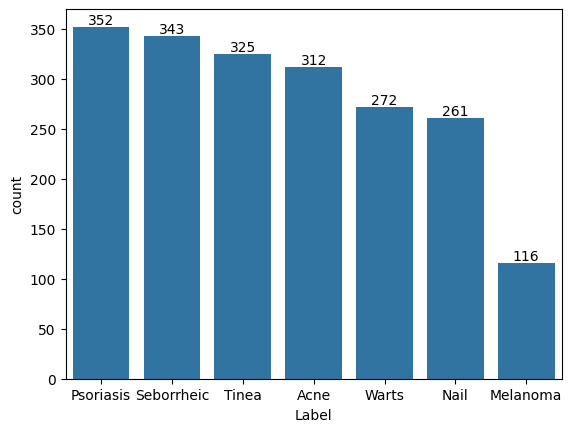

In [14]:
ax = sns.countplot(
    x=final_df_test["Label"],
    order=final_df_test["Label"].value_counts(ascending=False).index,
)

abs_values = final_df_test["Label"].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

[Text(0, 0, '1405'),
 Text(0, 0, '1371'),
 Text(0, 0, '1300'),
 Text(0, 0, '1086'),
 Text(0, 0, '1040'),
 Text(0, 0, '840'),
 Text(0, 0, '463')]

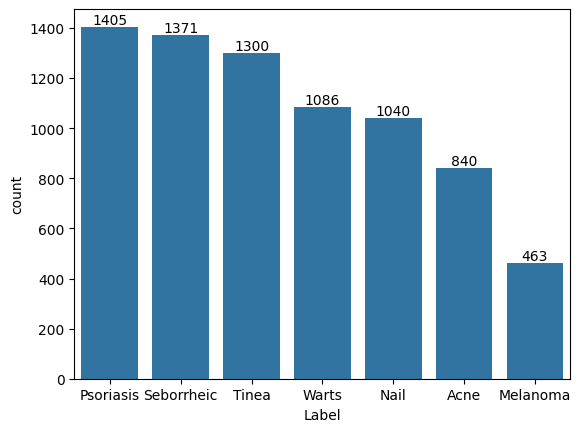

In [15]:
ax = sns.countplot(
    x=final_df["Label"], order=final_df["Label"].value_counts(ascending=False).index
)

abs_values = final_df["Label"].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

# Deal with Class Imbalance

In [16]:
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
import numpy as np

# Define data augmentation transformations
augmentation_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
        transforms.RandomRotation(15),  # Randomly rotate images by 15 degrees
        transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
        transforms.ColorJitter(
            brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
        ),  # Adjust color
        transforms.ToTensor(),  # Convert to PyTorch tensor
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # Normalize
    ]
)

# Define transformations for non-augmented data
base_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),  # Convert to PyTorch tensor
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # Normalize
    ]
)


# Custom Dataset Class
class BalancedDataset(Dataset):
    def __init__(self, dataframe, selected_classes_for_augmentation, target_size):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing image paths and labels.
            selected_classes_for_augmentation (list): List of class names to apply augmentation.
            target_size (int): The number of images to sample per class for balancing.
        """
        self.data = []
        self.selected_classes = selected_classes_for_augmentation
        self.target_size = target_size
        self.class_counts = dataframe["Label"].value_counts()

        for class_name, count in self.class_counts.items():
            class_samples = dataframe[dataframe["Label"] == class_name]

            # Oversample or undersample to match the target size
            if count < self.target_size:
                sampled_df = class_samples.sample(
                    n=self.target_size, replace=True
                )  # Oversample
            else:
                sampled_df = class_samples.sample(
                    n=self.target_size, replace=False
                )  # Undersample

            self.data.append(sampled_df)

        self.data = pd.concat(self.data).reset_index(drop=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        image_path = row["Image"]
        label = row["Label"]

        # Load the image
        image = Image.open(image_path).convert("RGB")

        # Apply augmentation only for selected classes
        if label in self.selected_classes:
            image = augmentation_transform(image)
        else:
            image = base_transform(image)

        # Convert label to index for PyTorch compatibility
        label_index = selected_classes.index(label)

        return image, label_index


# Define the selected classes and target size for balancing
selected_classes = [
    "Psoriasis",
    "Tinea",  # Fungal Infection
    "Melanoma",
    "Nail",
    "Acne",
    "Warts",
    "Seborrheic",  # Benign Tumors
]
selected_classes_for_augmentation = ["Psoriasis", "Tinea", "Melanoma"]

# Target number of images per class
target_size = max(final_df["Label"].value_counts())

# Create balanced datasets using train_df and test_df
train_balanced_dataset = BalancedDataset(
    final_df, selected_classes_for_augmentation, target_size
)
test_balanced_dataset = BalancedDataset(
    final_df_test, selected_classes_for_augmentation, target_size
)

# Create DataLoaders
train_loader = DataLoader(train_balanced_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_balanced_dataset, batch_size=32, shuffle=False)

# Print dataset information
print(f"Number of training samples (balanced): {len(train_balanced_dataset)}")
print(f"Number of testing samples (balanced): {len(test_balanced_dataset)}")

# Check the class distribution after balancing
train_class_counts_balanced = train_balanced_dataset.data["Label"].value_counts()
test_class_counts_balanced = test_balanced_dataset.data["Label"].value_counts()

print("\nTraining Dataset - Counts After Balancing:")
print(train_class_counts_balanced)

print("\nTesting Dataset - Counts After Balancing:")
print(test_class_counts_balanced)

Number of training samples (balanced): 9835
Number of testing samples (balanced): 9835

Training Dataset - Counts After Balancing:
Label
Psoriasis     1405
Seborrheic    1405
Tinea         1405
Warts         1405
Nail          1405
Acne          1405
Melanoma      1405
Name: count, dtype: int64

Testing Dataset - Counts After Balancing:
Label
Psoriasis     1405
Seborrheic    1405
Tinea         1405
Acne          1405
Warts         1405
Nail          1405
Melanoma      1405
Name: count, dtype: int64


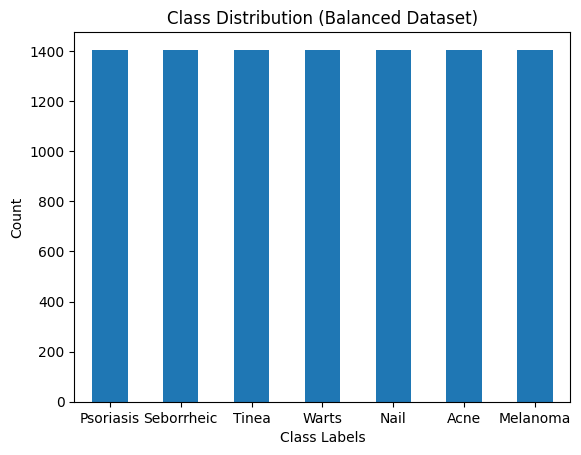

In [23]:
# Bar plot with Matplotlib
train_class_counts_balanced.plot(kind="bar")

# Customize the plot
plt.title("Class Distribution (Balanced Dataset)")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# Start with DeiT Modeling

In [65]:
import torch
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
import time
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.amp import GradScaler, autocast
from sklearn.utils.class_weight import compute_class_weight

In [66]:
num_classes = len(final_df["Label"].unique())  # Number of classes
model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224", num_labels=num_classes
)

Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
# Device configuration (MPS or CPU if MPS is unavailable)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model
num_classes = len(final_df["Label"].unique())  # Number of classes
model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224", num_labels=num_classes
)
model.to(device)  # Move model to the device

Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: mps


DeiTForImageClassification(
  (deit): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTSdpaAttention(
            (attention): DeiTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): L

In [69]:
# Define loss function and optimizer
criterion = CrossEntropyLoss(label_smoothing=0.1)
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

# Learning rate scheduler
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

# Early stopping parameters
early_stopping_patience = 3
best_val_loss = float("inf")
epochs_since_improvement = 0


# Gradient clipping
max_grad_norm = 1.0

# Mixed precision training (optional)
scaler = GradScaler()

# Set number of epochs
num_epochs = 10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [70]:
# Initialize lists to track accuracies and losses
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
all_labels = []
all_preds = []
all_probs = []  # For ROC curve (probabilities)

# Training loop
for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time of the epoch
    model.train()
    running_corrects = 0
    running_loss = 0.0
    total = 0

    # Training loop with tqdm for progress bar
    for batch_idx, (images, labels) in tqdm(
        enumerate(train_loader),
        total=len(train_loader),
        desc=f"Epoch {epoch+1}/{num_epochs}",
    ):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradients

        # Mixed precision forward and backward pass
        with autocast(
            device_type="cuda" if torch.cuda.is_available() else "cpu"
        ):  # Specify device type explicitly
            outputs = model(images)  # Forward pass
            loss = criterion(outputs.logits, labels)  # Compute loss

        # Scale loss and backward pass
        scaler.scale(loss).backward()  # Backpropagation with scaled loss

        # Gradient clipping
        scaler.unscale_(optimizer)  # Unscale gradients before clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_grad_norm)

        # Optimizer step
        scaler.step(optimizer)  # Update weights
        scaler.update()  # Update scaler for mixed precision

        # Calculate the number of correct predictions
        _, predicted = torch.max(outputs.logits, 1)
        running_corrects += (predicted == labels).sum().item()
        running_loss += loss.item()  # Add batch loss to running total
        total += labels.size(0)

        # Optional: Show progress every batch
        if batch_idx % 100 == 0:
            print(
                f"Batch {batch_idx}/{len(train_loader)}, Accuracy: {100 * running_corrects / total:.4f}%"
            )

    # Calculate and store the training accuracy and loss for this epoch
    train_accuracy = 100 * running_corrects / total
    train_accuracies.append(train_accuracy)
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Print the time taken for the current epoch and estimated time for remaining epochs
    print(
        f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy:.4f}%, Train Loss: {train_loss:.4f}"
    )

    # Validation loop (after each epoch)
    model.eval()  # Switch to evaluation mode
    val_corrects = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:  # Assuming val_loader is defined
            images, labels = images.to(device), labels.to(device)
            with autocast(
                device_type="cuda" if torch.cuda.is_available() else "cpu"
            ):  # Specify device type for validation
                outputs = model(images)
                loss = criterion(outputs.logits, labels)
            val_loss += loss.item()  # Add batch loss to validation loss

            # Calculate the number of correct predictions
            _, predicted = torch.max(outputs.logits, 1)
            val_corrects += (predicted == labels).sum().item()
            val_total += labels.size(0)

            # Store labels and predicted probabilities for ROC and Precision-Recall
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(
                torch.softmax(outputs.logits, dim=1).cpu().numpy()
            )  # Get probabilities for ROC

    # Calculate and store the validation accuracy and loss for this epoch
    val_accuracy = 100 * val_corrects / val_total
    val_accuracies.append(val_accuracy)
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Validation Loss after epoch {epoch+1}: {avg_val_loss:.4f}")
    print(f"Validation Accuracy after epoch {epoch+1}: {val_accuracy:.4f}%")

    # Calculate elapsed time for this epoch
    elapsed_time = time.time() - start_time
    remaining_time = elapsed_time * (num_epochs - (epoch + 1)) / (epoch + 1)
    print(f"Time taken for epoch {epoch+1}: {elapsed_time:.2f} seconds")
    print(f"Estimated time remaining: {remaining_time:.2f} seconds")

    # Step the scheduler
    scheduler.step(avg_val_loss)

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_since_improvement = 0
        # Save the best model
        torch.save(
            {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "scheduler_state_dict": scheduler.state_dict(),
                "loss": running_loss / len(train_loader),
            },
            "deit_finetuned_skin_disease_best_ClassBalancing.pth",
        )
    else:
        epochs_since_improvement += 1
        if epochs_since_improvement >= early_stopping_patience:
            print("Early stopping triggered. No improvement in validation loss.")
            break

Epoch 1/10:   0%|          | 1/308 [00:00<04:52,  1.05it/s]

Batch 0/308, Accuracy: 21.8750%


Epoch 1/10:  33%|███▎      | 101/308 [01:23<03:05,  1.12it/s]

Batch 100/308, Accuracy: 65.2228%


Epoch 1/10:  65%|██████▌   | 201/308 [02:50<01:35,  1.12it/s]

Batch 200/308, Accuracy: 71.8905%


Epoch 1/10:  98%|█████████▊| 301/308 [04:18<00:06,  1.09it/s]

Batch 300/308, Accuracy: 75.9448%


Epoch 1/10: 100%|██████████| 308/308 [04:24<00:00,  1.17it/s]


Epoch 1/10, Train Accuracy: 76.1362%, Train Loss: 0.9233
Validation Loss after epoch 1: 0.8357
Validation Accuracy after epoch 1: 80.2135%
Time taken for epoch 1: 435.23 seconds
Estimated time remaining: 3917.11 seconds


Epoch 2/10:   0%|          | 1/308 [00:01<06:13,  1.22s/it]

Batch 0/308, Accuracy: 93.7500%


Epoch 2/10:  33%|███▎      | 101/308 [01:57<03:46,  1.09s/it]

Batch 100/308, Accuracy: 89.4802%


Epoch 2/10:  65%|██████▌   | 201/308 [03:43<01:49,  1.02s/it]

Batch 200/308, Accuracy: 90.3141%


Epoch 2/10:  98%|█████████▊| 301/308 [05:23<00:06,  1.02it/s]

Batch 300/308, Accuracy: 90.3654%


Epoch 2/10: 100%|██████████| 308/308 [05:29<00:00,  1.07s/it]


Epoch 2/10, Train Accuracy: 90.3915%, Train Loss: 0.6509
Validation Loss after epoch 2: 0.8472
Validation Accuracy after epoch 2: 80.3965%
Time taken for epoch 2: 471.01 seconds
Estimated time remaining: 1884.03 seconds


Epoch 3/10:   0%|          | 1/308 [00:01<05:42,  1.11s/it]

Batch 0/308, Accuracy: 96.8750%


Epoch 3/10:  33%|███▎      | 101/308 [01:49<03:42,  1.08s/it]

Batch 100/308, Accuracy: 92.8218%


Epoch 3/10:  65%|██████▌   | 201/308 [03:35<01:50,  1.03s/it]

Batch 200/308, Accuracy: 93.1437%


Epoch 3/10:  98%|█████████▊| 301/308 [05:18<00:07,  1.02s/it]

Batch 300/308, Accuracy: 93.3036%


Epoch 3/10: 100%|██████████| 308/308 [05:24<00:00,  1.06s/it]


Epoch 3/10, Train Accuracy: 93.3401%, Train Loss: 0.5938
Validation Loss after epoch 3: 0.8081
Validation Accuracy after epoch 3: 83.0198%
Time taken for epoch 3: 469.11 seconds
Estimated time remaining: 1094.60 seconds


Epoch 4/10:   0%|          | 1/308 [00:01<05:14,  1.03s/it]

Batch 0/308, Accuracy: 96.8750%


Epoch 4/10:  33%|███▎      | 101/308 [01:47<03:49,  1.11s/it]

Batch 100/308, Accuracy: 94.3069%


Epoch 4/10:  65%|██████▌   | 201/308 [03:39<01:57,  1.09s/it]

Batch 200/308, Accuracy: 94.5585%


Epoch 4/10:  98%|█████████▊| 301/308 [05:26<00:07,  1.07s/it]

Batch 300/308, Accuracy: 94.5909%


Epoch 4/10: 100%|██████████| 308/308 [05:33<00:00,  1.08s/it]


Epoch 4/10, Train Accuracy: 94.6009%, Train Loss: 0.5643
Validation Loss after epoch 4: 0.7811
Validation Accuracy after epoch 4: 84.4026%
Time taken for epoch 4: 476.50 seconds
Estimated time remaining: 714.75 seconds


Epoch 5/10:   0%|          | 1/308 [00:01<05:09,  1.01s/it]

Batch 0/308, Accuracy: 93.7500%


Epoch 5/10:  33%|███▎      | 101/308 [01:47<03:53,  1.13s/it]

Batch 100/308, Accuracy: 95.6993%


Epoch 5/10:  65%|██████▌   | 201/308 [03:41<01:58,  1.11s/it]

Batch 200/308, Accuracy: 95.4913%


Epoch 5/10:  98%|█████████▊| 301/308 [05:30<00:07,  1.05s/it]

Batch 300/308, Accuracy: 95.7537%


Epoch 5/10: 100%|██████████| 308/308 [05:37<00:00,  1.09s/it]


Epoch 5/10, Train Accuracy: 95.7499%, Train Loss: 0.5438
Validation Loss after epoch 5: 0.7998
Validation Accuracy after epoch 5: 83.5892%
Time taken for epoch 5: 479.50 seconds
Estimated time remaining: 479.50 seconds


Epoch 6/10:   0%|          | 1/308 [00:01<05:33,  1.09s/it]

Batch 0/308, Accuracy: 87.5000%


Epoch 6/10:  33%|███▎      | 101/308 [01:41<03:28,  1.00s/it]

Batch 100/308, Accuracy: 96.0396%


Epoch 6/10:  65%|██████▌   | 201/308 [03:25<01:56,  1.09s/it]

Batch 200/308, Accuracy: 96.1443%


Epoch 6/10:  98%|█████████▊| 301/308 [05:14<00:07,  1.07s/it]

Batch 300/308, Accuracy: 96.2002%


Epoch 6/10: 100%|██████████| 308/308 [05:21<00:00,  1.04s/it]


Epoch 6/10, Train Accuracy: 96.2379%, Train Loss: 0.5340
Validation Loss after epoch 6: 0.7500
Validation Accuracy after epoch 6: 86.0905%
Time taken for epoch 6: 465.96 seconds
Estimated time remaining: 310.64 seconds


Epoch 7/10:   0%|          | 1/308 [00:01<05:25,  1.06s/it]

Batch 0/308, Accuracy: 100.0000%


Epoch 7/10:  33%|███▎      | 101/308 [01:47<03:45,  1.09s/it]

Batch 100/308, Accuracy: 96.6275%


Epoch 7/10:  65%|██████▌   | 201/308 [03:38<01:55,  1.08s/it]

Batch 200/308, Accuracy: 96.6884%


Epoch 7/10:  98%|█████████▊| 301/308 [05:25<00:07,  1.04s/it]

Batch 300/308, Accuracy: 96.4909%


Epoch 7/10: 100%|██████████| 308/308 [05:32<00:00,  1.08s/it]


Epoch 7/10, Train Accuracy: 96.4921%, Train Loss: 0.5258
Validation Loss after epoch 7: 0.7809
Validation Accuracy after epoch 7: 84.7178%
Time taken for epoch 7: 474.74 seconds
Estimated time remaining: 203.46 seconds


Epoch 8/10:   0%|          | 1/308 [00:01<05:17,  1.04s/it]

Batch 0/308, Accuracy: 100.0000%


Epoch 8/10:  33%|███▎      | 101/308 [01:43<03:31,  1.02s/it]

Batch 100/308, Accuracy: 96.9059%


Epoch 8/10:  65%|██████▌   | 201/308 [03:28<01:55,  1.08s/it]

Batch 200/308, Accuracy: 96.9838%


Epoch 8/10:  98%|█████████▊| 301/308 [05:15<00:07,  1.06s/it]

Batch 300/308, Accuracy: 97.1657%


Epoch 8/10: 100%|██████████| 308/308 [05:22<00:00,  1.05s/it]


Epoch 8/10, Train Accuracy: 97.1632%, Train Loss: 0.5130
Validation Loss after epoch 8: 0.8352
Validation Accuracy after epoch 8: 83.5791%
Time taken for epoch 8: 465.52 seconds
Estimated time remaining: 116.38 seconds


Epoch 9/10:   0%|          | 1/308 [00:01<05:27,  1.07s/it]

Batch 0/308, Accuracy: 96.8750%


Epoch 9/10:  33%|███▎      | 101/308 [01:44<03:30,  1.02s/it]

Batch 100/308, Accuracy: 97.5557%


Epoch 9/10:  65%|██████▌   | 201/308 [03:29<01:53,  1.06s/it]

Batch 200/308, Accuracy: 97.4036%


Epoch 9/10:  98%|█████████▊| 301/308 [05:15<00:07,  1.05s/it]

Batch 300/308, Accuracy: 97.3007%


Epoch 9/10: 100%|██████████| 308/308 [05:22<00:00,  1.05s/it]


Epoch 9/10, Train Accuracy: 97.2750%, Train Loss: 0.5097
Validation Loss after epoch 9: 0.8095
Validation Accuracy after epoch 9: 84.6873%
Time taken for epoch 9: 464.87 seconds
Estimated time remaining: 51.65 seconds
Early stopping triggered. No improvement in validation loss.


In [71]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation during evaluation
    for images, labels in val_loader:  # Assuming val_loader is defined
        images, labels = images.to(device), labels.to(device)

        # Get model outputs (logits)
        outputs = model(images)

        # Get predictions from the logits
        _, predicted = torch.max(outputs.logits, 1)

        # Update total and correct counters
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 84.53%


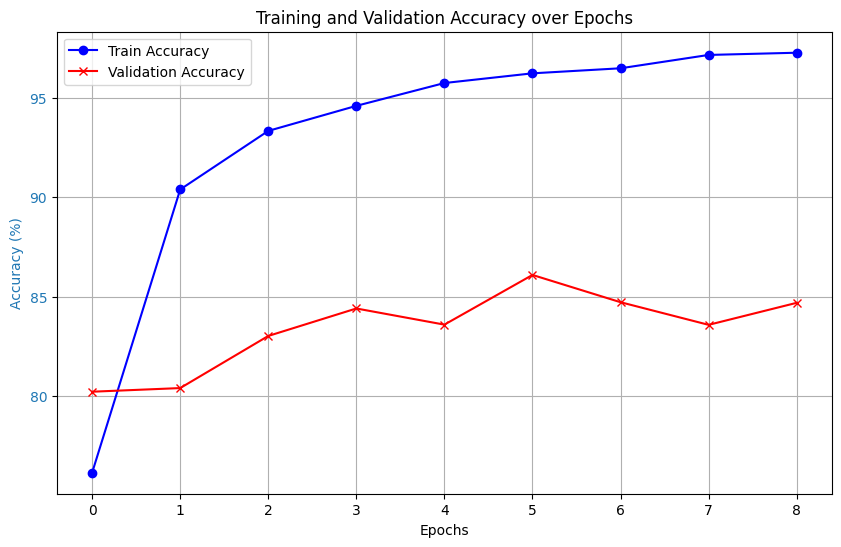

In [73]:
# Plot Training and Validation Accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting accuracy
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy (%)", color="tab:blue")
ax1.plot(
    range(9),
    train_accuracies,
    label="Train Accuracy",
    color="blue",
    linestyle="-",
    marker="o",
)
ax1.plot(
    range(9),
    val_accuracies,
    label="Validation Accuracy",
    color="red",
    linestyle="-",
    marker="x",
)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.legend(loc="upper left")

plt.title("Training and Validation Accuracy over Epochs")
plt.grid(True)
plt.show()

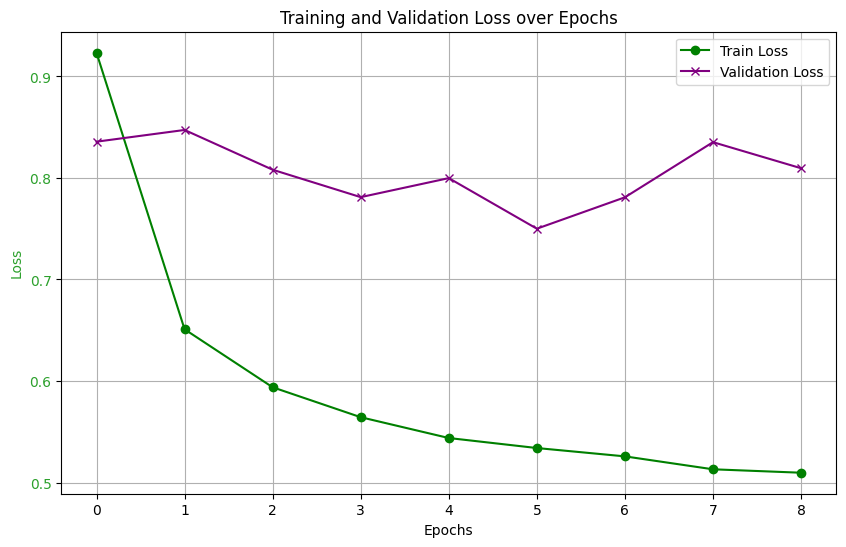

In [74]:
# Plot Training and Validation Loss
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plotting loss
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss", color="tab:green")
ax2.plot(
    range(9),
    train_losses,
    label="Train Loss",
    color="green",
    linestyle="-",
    marker="o",
)
ax2.plot(
    range(9),
    val_losses,
    label="Validation Loss",
    color="purple",
    linestyle="-",
    marker="x",
)
ax2.tick_params(axis="y", labelcolor="tab:green")
ax2.legend(loc="upper right")

plt.title("Training and Validation Loss over Epochs")
plt.grid(True)
plt.show()

In [75]:
# Binarize labels and predictions for multi-class ROC and Precision-Recall
all_labels_bin = label_binarize(
    all_labels, classes=np.unique(all_labels)
)  # Binarize labels for multi-class case
all_probs = np.array(all_probs)

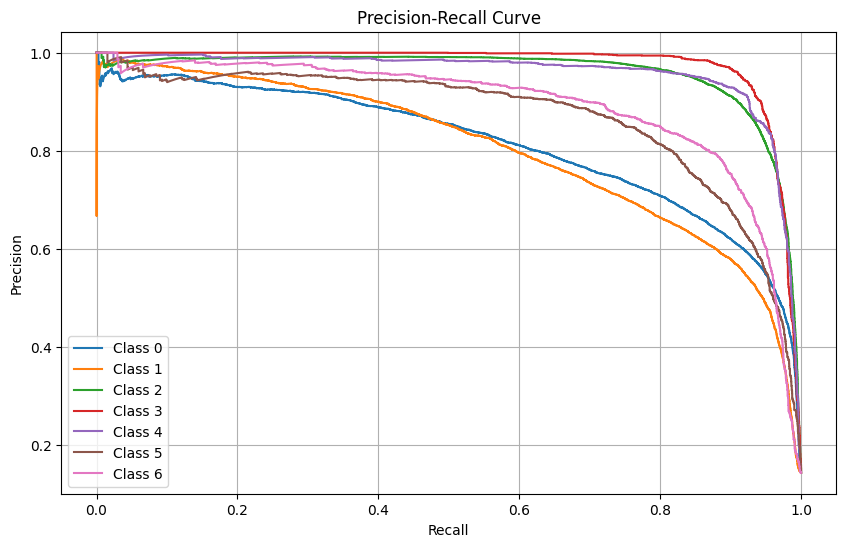

In [76]:
# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(all_labels_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(all_labels_bin[:, i], all_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)
plt.show()

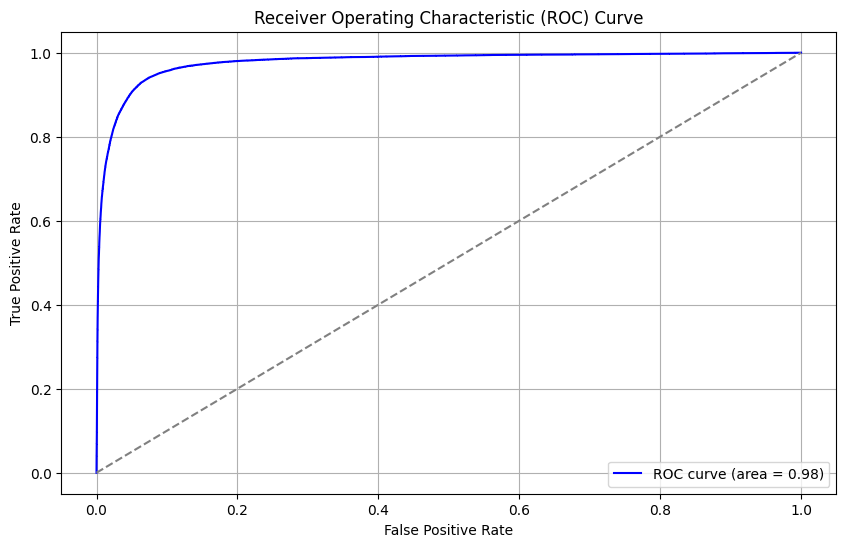

In [77]:
# ROC Curve
fpr, tpr, _ = roc_curve(all_labels_bin.ravel(), all_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [81]:
# Save the final model after training (even if early stopping occurs)
# torch.save(
#     {
#         "epoch": epoch,
#         "model_state_dict": model.state_dict(),
#         "optimizer_state_dict": optimizer.state_dict(),
#         "scheduler_state_dict": scheduler.state_dict(),
#         "loss": running_loss / len(train_loader),
#     },
#     "deit_finetuned_skin_disease_final_BalancedClasses.pth",
# )

torch.save(model.state_dict(), "deit_finetuned_skin_disease_final_BalancedClasses.pth")

In [79]:
pretrained_state = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224"
).state_dict()
trained_state = torch.load("deit_finetuned_skin_disease_final_BalancedClasses.pth")
print("Pretrained Keys:", len(pretrained_state.keys()))
print("Trained Keys:", len(trained_state.keys()))

Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/tc/xk9whcf93kl_0nyd7t8d69100000gn/T/ipykernel_1486/3786724783.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlist

Pretrained Keys: 201
Trained Keys: 201
